In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/november_raw_data.csv')
df.head()

,Departure Airport,Departure Time,Arrival Airport,Arrival Time,Carrier Code,Flight Number,Price (VND),Duration
0,SGN,2024-11-01T05:00:00,HAN,2024-11-01T07:10:00,VJ,194,1546000.0,PT2H10M
1,SGN,2024-11-01T05:20:00,HAN,2024-11-01T07:30:00,VJ,198,1546000.0,PT2H10M
2,SGN,2024-11-01T06:00:00,HAN,2024-11-01T08:10:00,VJ,120,1546000.0,PT2H10M
3,SGN,2024-11-01T06:30:00,HAN,2024-11-01T08:40:00,VJ,122,1546000.0,PT2H10M
4,SGN,2024-11-01T07:30:00,HAN,2024-11-01T09:40:00,VJ,126,1546000.0,PT2H10M


In [8]:
df['Routine'] = df['Departure Airport'] + '-' + df['Arrival Airport']
df.drop(columns=['Departure Airport', 'Arrival Airport'], inplace=True)

In [4]:
df.describe()


,Flight Number,Price (VND)
count,287146.000000,2.871460e+05
mean,2564.785663,4.476562e+06
std,1801.040353,1.689468e+06
min,101.000000,1.223000e+06
25%,602.000000,3.431000e+06
50%,2495.000000,4.139000e+06
75%,4305.000000,5.347000e+06
max,8098.000000,1.762500e+07


In [6]:
# define numerical & categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print(f'We have {len(numeric_features)} numerical features :{numeric_features}')
print(f'We have {len(categorical_features)} categorical features :{categorical_features}')

We have 2 numerical features :['Flight Number', 'Price (VND)']
We have 6 categorical features :['Departure Airport', 'Departure Time', 'Arrival Airport', 'Arrival Time', 'Carrier Code', 'Duration']


In [7]:
for col in df:
    print(df[col].value_counts(normalize=True) * 100)
    print('----------------------------')

Departure Airport
SGN    36.564326
HAN    25.534745
DAD    10.274564
HPH     4.270650
VII     4.267864
DLI     4.188113
CXR     3.838814
HUI     3.567175
BMV     3.294143
VCA     1.580381
PQC     1.147848
UIH     0.598302
PXU     0.465269
VCS     0.281738
DIN     0.064427
VCL     0.026467
VDH     0.020199
TBB     0.014975
Name: proportion, dtype: float64
----------------------------
Departure Time
2024-11-03T23:15:00    0.069999
2024-11-20T23:15:00    0.069651
2024-11-10T23:15:00    0.069651
2024-11-27T23:15:00    0.069303
2024-11-15T23:15:00    0.069303
                         ...   
2024-11-14T08:20:00    0.000348
2024-11-14T10:05:00    0.000348
2024-11-06T10:05:00    0.000348
2024-11-15T14:05:00    0.000348
2024-11-08T13:35:00    0.000348
Name: proportion, Length: 5813, dtype: float64
----------------------------
Arrival Airport
SGN    30.783643
HAN    27.643081
DAD    10.420831
HPH     4.973080
VII     4.632835
CXR     4.400201
HUI     4.305475
DLI     4.286321
BMV     3.793541
VC

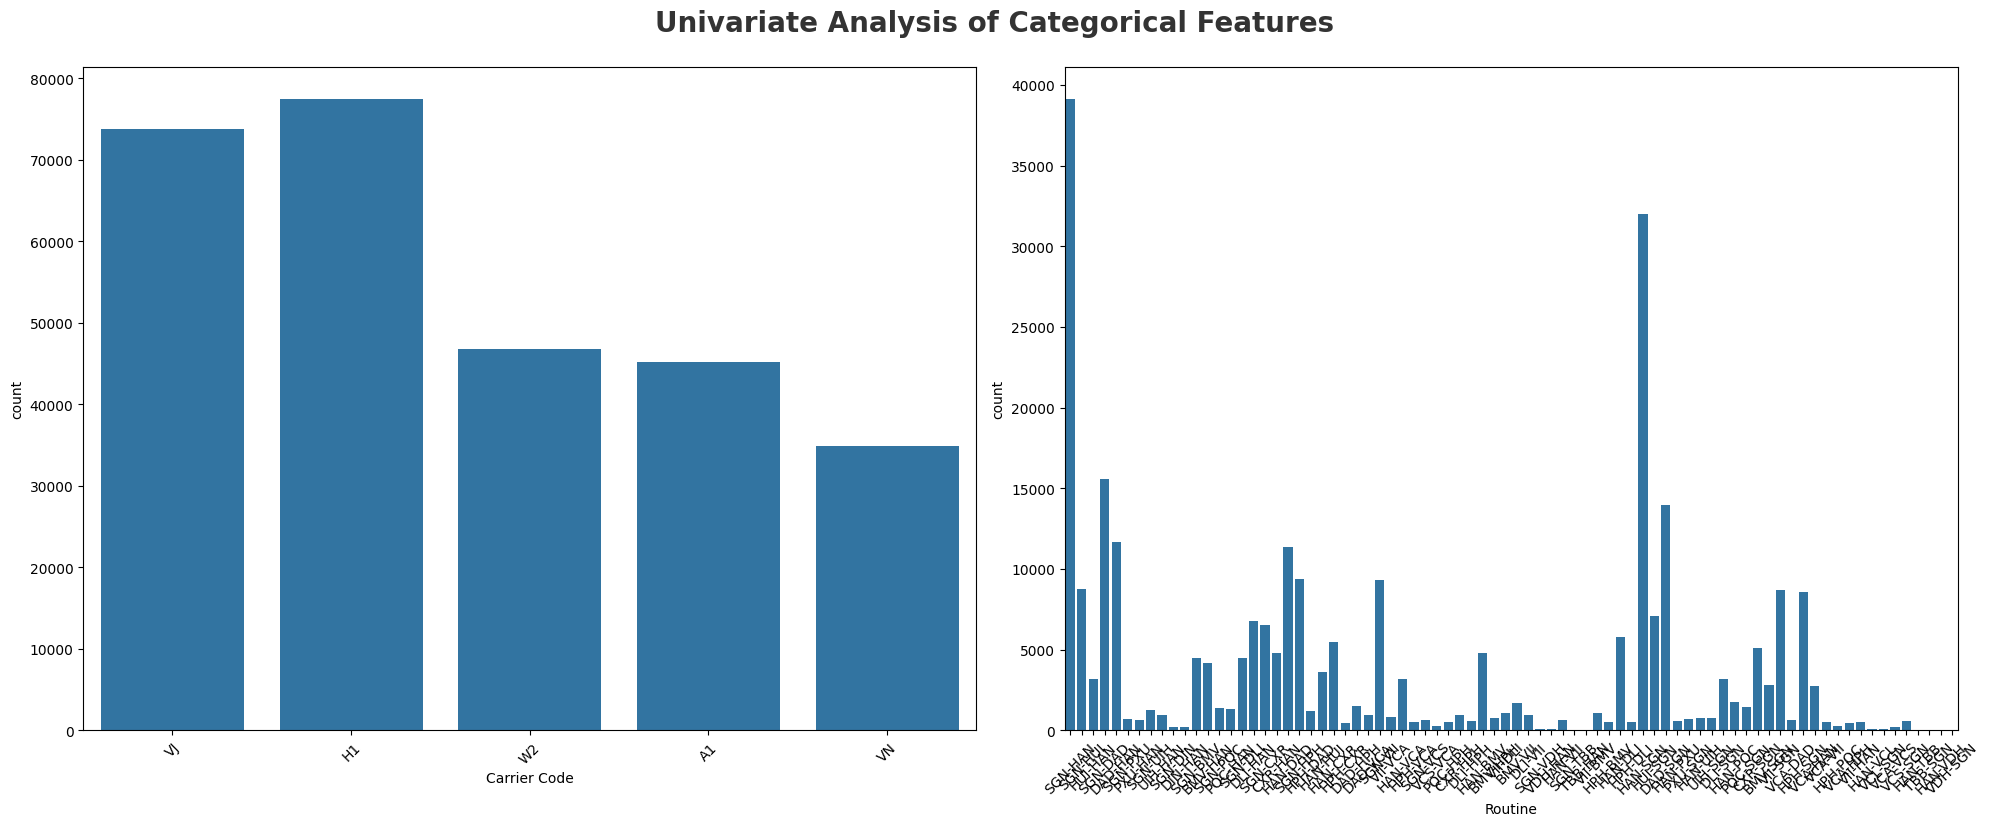

In [17]:
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'Carrier Code', 'Routine']
for i in range(0, len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [19]:
df = df[df['Carrier Code'] != 'QH']
df.head()


,Departure Time,Arrival Time,Carrier Code,Flight Number,Price (VND),Duration,Routine
0,2024-11-01T05:00:00,2024-11-01T07:10:00,VJ,194,1546000.0,PT2H10M,SGN-HAN
1,2024-11-01T05:20:00,2024-11-01T07:30:00,VJ,198,1546000.0,PT2H10M,SGN-HAN
2,2024-11-01T06:00:00,2024-11-01T08:10:00,VJ,120,1546000.0,PT2H10M,SGN-HAN
3,2024-11-01T06:30:00,2024-11-01T08:40:00,VJ,122,1546000.0,PT2H10M,SGN-HAN
4,2024-11-01T07:30:00,2024-11-01T09:40:00,VJ,126,1546000.0,PT2H10M,SGN-HAN


In [23]:
from scipy.stats import chi2_contingency
chi2_test=[]
for feature in ['Carrier Code', 'Duration', 'Routine']:
    if chi2_contingency(pd.crosstab(df['Price (VND)'],df[feature]))[1] <0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result=pd.DataFrame(data=[['Carrier Code', 'Duration', 'Routine'],chi2_test]).T
result.columns=['Column','Hypothesis Result']
result

,Column,Hypothesis Result
0,Carrier Code,Reject Null Hypothesis
1,Duration,Reject Null Hypothesis
2,Routine,Reject Null Hypothesis


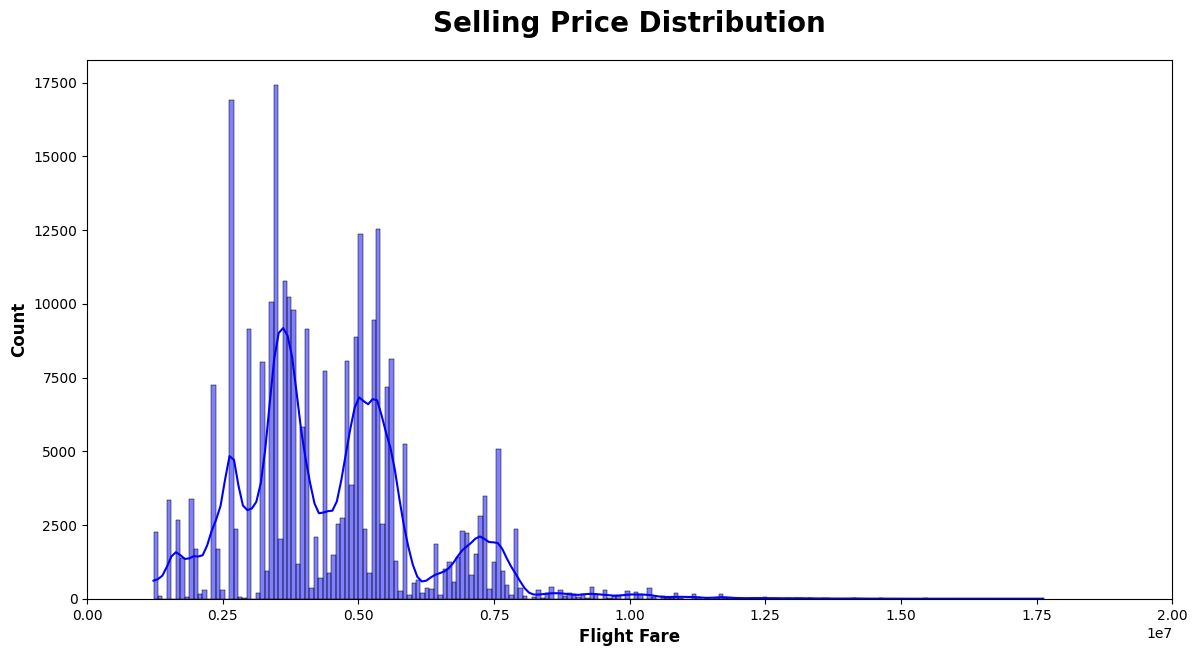

In [29]:
plt.subplots(figsize=(14,7))
sns.histplot(df['Price (VND)'], bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Flight Fare", weight="bold", fontsize=12)
plt.xlim(0,20000000)
plt.show()


C:\Users\Tran Dinh Gia\AppData\Local\Temp\ipykernel_2396\3653582801.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Carrier Code", data=df,ec = "black",palette="Set1",order = df['Carrier Code'].value_counts().index)


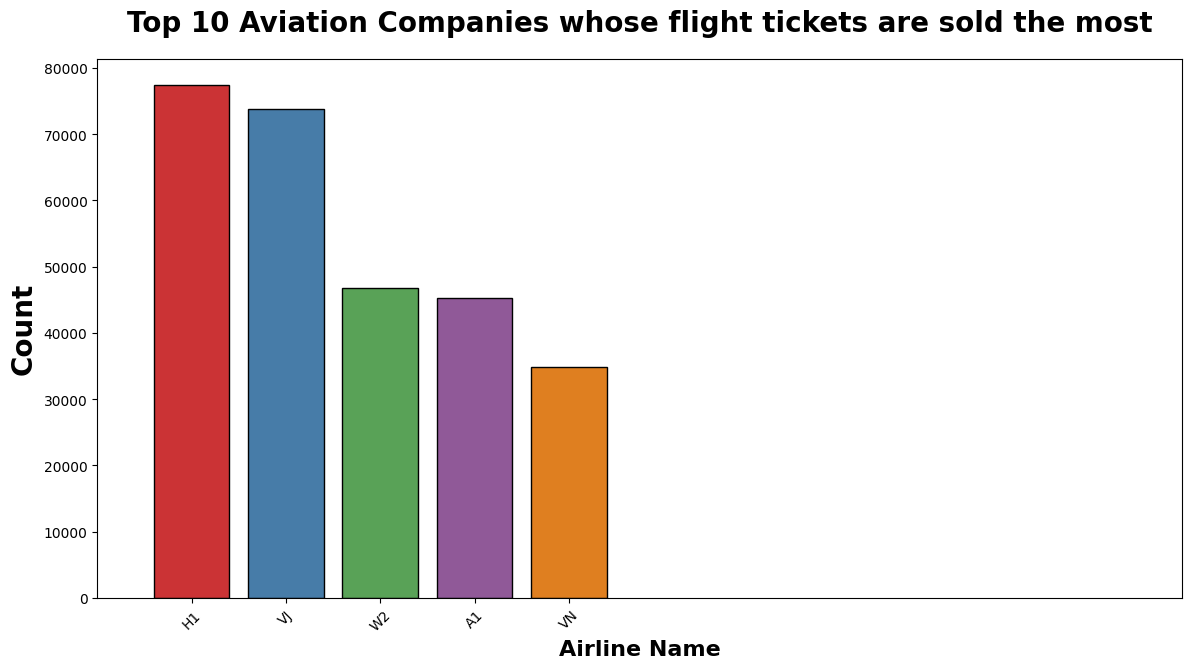

In [30]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Carrier Code", data=df,ec = "black",palette="Set1",order = df['Carrier Code'].value_counts().index)
plt.title("Top 10 Aviation Companies whose flight tickets are sold the most", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Airline Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [40]:
aviation_company_airline = df.groupby('Carrier Code').Price.max()
aviation_company= aviation_company_airline.to_frame().sort_values('Price',ascending=False)[0:10]
aviation_company

,Price
Carrier Code,
VN,17625000
A1,7866000
W2,5865000
H1,5643000
VJ,5233000


C:\Users\Tran Dinh Gia\AppData\Local\Temp\ipykernel_2396\316328521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aviation_company_airline.index, y=aviation_company_airline.values,ec = "black",palette="Set2")


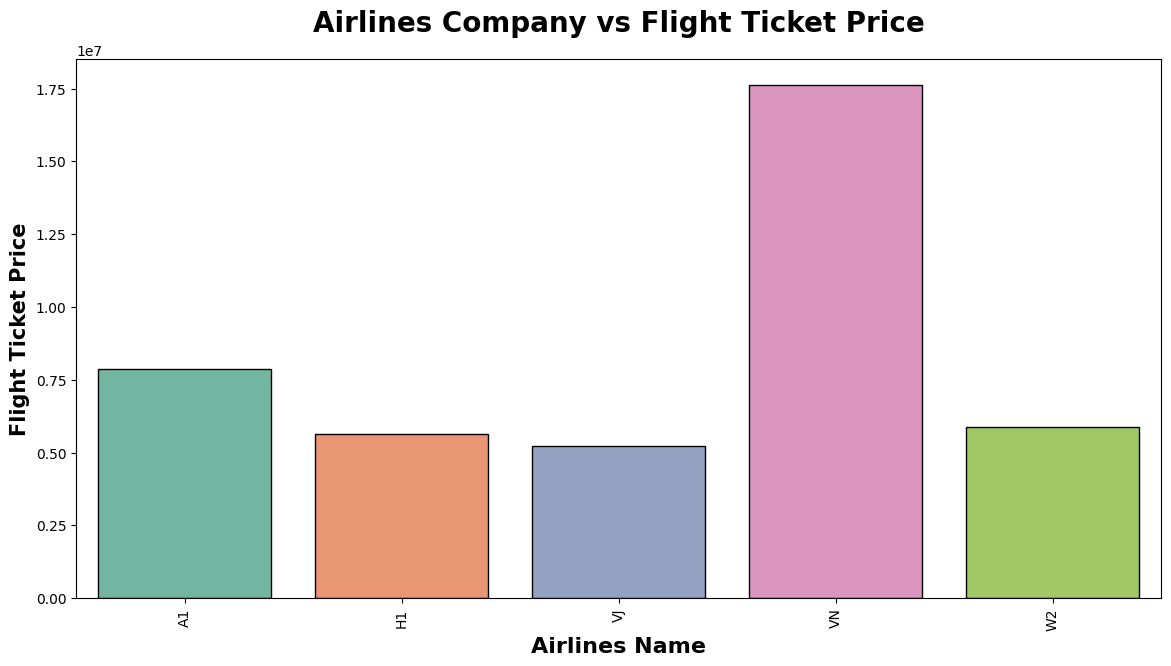

In [41]:
plt.subplots(figsize=(14,7))
sns.barplot(x=aviation_company_airline.index, y=aviation_company_airline.values,ec = "black",palette="Set2")
plt.title("Airlines Company vs Flight Ticket Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Flight Ticket Price", weight="bold", fontsize=15)
plt.xlabel("Airlines Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()